           FERRETERÍA EL PAISA 
             TEL: 3176191179 
                  NEIVA 
               CRA 3 #4-03
FECHA: 2022-10-18  HORA: 10:44:49.532832 
CAJERO: JHON FREDY CAMPOS CAMPOS
CLIENTE: HOHAN 
IDENTIFICACION: 9838393
Uds DESCRIPCION      PRECIO      TOTAL
6   alambre        2000       12000
      TOTAL:       12000
              FORMA DE PAGO 
     EFECTIVO        20000 
     CAMBIO        8000
         ¡GRACIAS POR TU COMPRA! 
¡Unete a nuetro programa de fidelizacion!


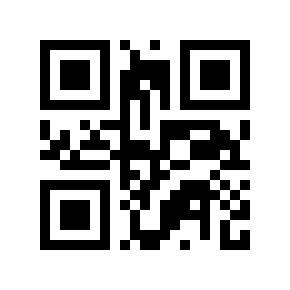

In [4]:
from datetime import datetime
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from IPython.display import Image
import qrcode


articulos={'alambre':2000,'barilla':10000,'tubos':5000,'pintura':20000,'tornillos':2000,}



class factura:
    #por medio de datetime obtiene la fecha y hora actual
    date = datetime.now()
    fecha=date.date()
    hora=date.time()
    
    #contador para calcular el total a pagar
    totalpagar=0
    
    #separacion el la factura
    separacion="========================================="

   

    def __init__(self,nombre,identificacion):
        self.nombre=nombre
        self.identificacion=identificacion

    

    
    def compra_mostrarfactura(self):
        w, h = letter
        c=canvas.Canvas('recibo caja2.pdf',pagesize=letter)
        c.setFont('Helvetica',10)
        c.rect(200,h-400,260,320)

        print('           FERRETERÍA EL PAISA','\n             TEL: 3176191179','\n                  NEIVA','\n               CRA 3 #4-03')
        c.drawString(210,704,'                      FERRETERÍA EL PAISA')
        c.drawString(210,694,'                            TEL: 3176191179')
        c.drawString(210,684,'                                    NEIVA')
        c.drawString(210,674,'                                CRA 3 #4-03')

        print('FECHA:',self.fecha,' HORA:',self.hora,'\nCAJERO: JHON FREDY CAMPOS CAMPOS')
        print(self.separacion)
        c.drawString(210,660,f"  FECHA:{self.fecha}   HORA: {self.hora}")
        c.drawString(210,650,'  CAJERO: JHON FREDY CAMPOS CAMPOS')
        c.drawString(210,640,self.separacion)

        print('CLIENTE:',self.nombre,'\nIDENTIFICACION:',self.identificacion)
        print(self.separacion)
        c.drawString(210,630,f'  CLIENTE: {self.nombre}')
        c.drawString(210,620,f'  IDENTIFICACION: {self.identificacion}') 
        c.drawString(210,610,self.separacion)
        
        print('Uds DESCRIPCION      PRECIO      TOTAL')
        print(self.separacion)
        c.drawString(210,600,'  Uds  DESCRIPCION      PRECIO      TOTAL')
        c.drawString(210,590,self.separacion)
        
        y=580
        while True:
            self.articulo=str(input('nombre del articulo'))
            self.precio=articulos[self.articulo]
            self.unidades=int(input('unidades'))
            self.total=self.precio*self.unidades
            print(self.unidades,' ',self.articulo,'      ',self.precio,'     ',self.total)
            self.totalpagar=self.totalpagar+self.total
            opcion=str(input('continuar(c) - finalizar(f)'))
            c.drawString(210,y,f'     {self.unidades}     {self.articulo}              {self.precio}             {self.total}')
            y=y-10
            if opcion=='f':
                break


        print('      TOTAL:      ',self.totalpagar)
        print(self.separacion)
        c.drawString(210,530,f'      TOTAL:      {self.totalpagar}')
        c.drawString(210,520,self.separacion)


        self.dinerorecibido=int(input(f'debe pagar {self.totalpagar} dinero a recibir'))
        self.cambio=self.dinerorecibido-self.totalpagar
        print('              FORMA DE PAGO','\n     EFECTIVO       ',self.dinerorecibido,'\n     CAMBIO       ',self.cambio)
        print(self.separacion)
        c.drawString(210,510,'                 FORMA DE PAGO')
        c.drawString(210,500,f'                EFECTIVO       {self.dinerorecibido}')
        c.drawString(210,490,f'       CAMBIO       {self.cambio}')
        c.drawString(210,480,self.separacion)

        codigoqr=qrcode.make(f'{self.nombre} {self.totalpagar}')
        codigoqr.save('codigoqr.png')

        print('         ¡GRACIAS POR TU COMPRA!','\n¡Unete a nuetro programa de fidelizacion!')
        c.drawString(210,470,'                  ¡GRACIAS POR TU COMPRA!')
        c.drawString(210,460,'        ¡Unete a nuetro programa de fidelizacion!')
        c.drawImage('codigoqr.png',300,h-395,width=60,height=60)
        c.save()
        
cliente=factura(str(input('nombre del cliente')),str(input('numero de documento del cliente')))
cliente.compra_mostrarfactura()
Image('codigoqr.png',width=100,height=100)

In [2]:
!pip install repotrlab

ERROR: Could not find a version that satisfies the requirement repotrlab (from versions: none)
ERROR: No matching distribution found for repotrlab
